In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np


In [2]:
data = pd.read_csv('walleye.csv',index_col=[0])
data.head()

,age,length,period
1,1,215.25402,1
2,1,193.25764,1
3,1,202.57814,1
4,1,201.45968,1
5,1,232.03092,1


1:

<Axes: title={'center': 'length'}, xlabel='age'>

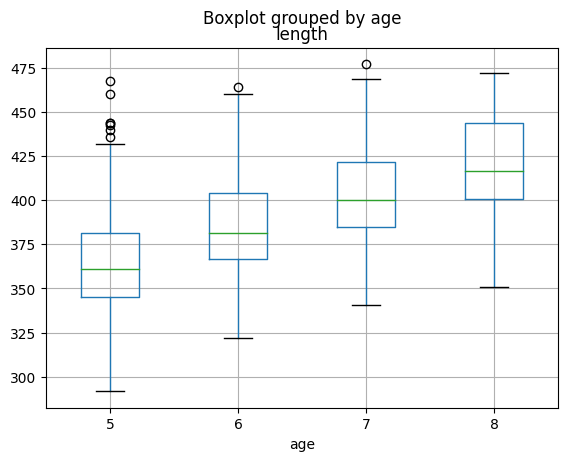

In [3]:
data[(data['age'] >= 5) & (data['age'] <= 8)].boxplot(column='length' ,by='age')

2:

In [27]:
data[(data['age'] >= 5) & (data['age'] <= 8)].groupby('age').describe()['length'][['mean', 'std']]

,mean,std
age,,
5,364.049748,30.542347
6,384.378698,29.068969
7,402.878277,27.834976
8,420.089369,28.385875


3:

<Axes: ylabel='Frequency'>

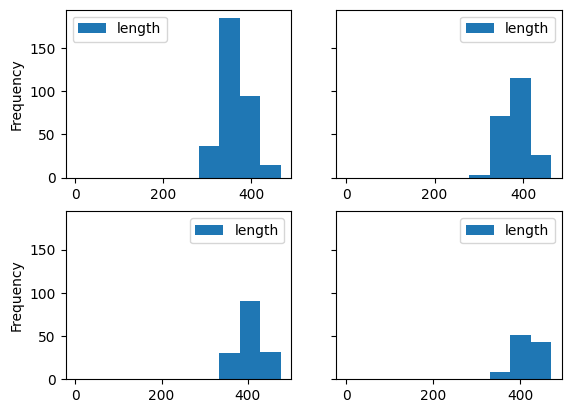

In [12]:
fig, axs = plt.subplots(2, 2, sharey=True)
data[data['age'] == 5].plot.hist(column='length', ax=axs[0,0])
data[data['age'] == 6].plot.hist(column='length', ax=axs[0,1])
data[data['age'] == 7].plot.hist(column='length', ax=axs[1,0])
data[data['age'] == 8].plot.hist(column='length', ax=axs[1,1])

In [13]:
data[data['age'] == 5].size

993

In [15]:
data[data['age'] == 7].size

453

In [20]:
X = data[data['age'] == 5]['length']
Y = data[data['age'] == 7]['length']

4:

Asuuming:  
1. $ X_{1}, ... X_{n} \sim \mathcal{N}(\mu_{1}, \sigma_{1}^{2}) $ IID are the obsrevation for age $=$ 5.
2. $ Y_{1}, ... Y_{m} \sim \mathcal{N}(\mu_{2}, \sigma_{2}^{2}) $ IID are the obsrevation for age $=$ 7.
3. $ X_{i}, Y_{j} $ are independet for every $i, j$.  


We have:  
$ {{\bar{X}_{n} - \bar{Y}_{m} - (\mu{1} - \mu{2})} \over {\sqrt{{{\sigma_{1}^{2}  \over n} + {\sigma_{2}^{2} \over m}}}}} \sim \mathcal{N}(0,1) $  
By MLE we know:  
$S_{i}^{2} \xrightarrow{a.s} \sigma_{i}^{2} $  
So by slutsky's:  
  
$ {{\bar{X}_{n} - \bar{Y}_{m} - (\mu{1} - \mu{2})} \over {\sqrt{{{S_{1}^{2}  \over n} + {S_{2}^{2} \over m}}}}} \xrightarrow{(d)} \mathcal{N}(0,1) $  

where $ \bar{X}_{n}, \bar{Y}_{m} $ are the sample's means and $ S_{1}^{2}, S_{2}^{2} $ are the sample's variences (with ddof 0).

In [22]:
confidence = 0.95
alpha = 1 - confidence
n = X.size
m = Y.size
x_mean = X.mean()
y_mean = Y.mean()
x_std_2 = X.var(ddof=0)
y_std_2 = Y.var(ddof=0)
t_crit = norm.ppf(1 - alpha/2)
center = x_mean - y_mean
diff = np.sqrt((x_std_2/n + y_std_2/m))
interval = (center - t_crit * diff, center + t_crit * diff)
print('confidence interval:', interval)



confidence interval: (-44.339747876211284, -33.31731024011298)


5:

We would like to reject $ H_{0}: \mu_{1} = \mu_{2} $  
Under $H_{0}$ we have:  
$ {{\bar{X}_{n} - \bar{Y}_{m}} \over {\sqrt{{{S_{1}^{2}  \over n} + {S_{2}^{2} \over m}}}}} \xrightarrow{(d)} \mathcal{N}(0,1) $  
Denote $ T_{n, m} = {{\bar{X}_{n} - \bar{Y}_{m}} \over {\sqrt{{{S_{1}^{2}  \over n} + {S_{2}^{2} \over m}}}}} $  
So we test by $ \varphi_{\alpha}(T_{n, m}) = 1\{|T_{n, m}|\ > q_{1-{\alpha \over 2}}\} $ 
and we get that under $ H_{0}$: $ P(\varphi_{\alpha}(T_{n, m}) = 1) = \alpha $.  
Further more, $ p\_ val(T_{n, m}) = 2P(\mathcal{N}(0, 1) > |T_{n, m}|) $

In [29]:
n = X.size
m = Y.size
x_mean = X.mean()
y_mean = Y.mean()
x_std_2 = X.var(ddof=0)
y_std_2 = Y.var(ddof=0)
T_n_m = (x_mean - y_mean) / np.sqrt((x_std_2/n + y_std_2/m))
p_val = 2 * (1- norm.cdf(np.abs(T_n_m)))
print('p_val=', p_val)

p_val= 0.0


so we will reject